<a href="https://colab.research.google.com/github/adiebatic/Coursework-Samples/blob/master/AP156_Week3_CP5_18_(RK4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this problem, we consider two particles, each of mass $m$ and charge $Q$, moving on the xy plane in a constant magnetic field $\vec{B} = B\hat{z}$. We will be solving the equations of motion using the 4th order Runge-Kutta Method. In addition, we will be plotting the resulting trajectories. 


In [ ]:
import numpy as np               
import matplotlib.pyplot as plt  
plt.style.use("bmh")   
from mpl_toolkits.mplot3d import Axes3D, axes3d       # For 3D-plotting
%matplotlib inline                  

To describe the trajectories of the particles, we consider the following form of the Lorentz force law:

$\frac{d^2\vec{r}}{dt^2} = \frac{Q}{m}(\frac{d\vec{r}}{dt} \times \vec{B})$

In [ ]:
# Returns the RHS of the Lorentz Force ODE
def LorentzForce(A, Qbym, t, B0):

  """
  A: 1X6 matrix containing the particle's position and velocity
  Qbym: charge divided by mass
  t: time
  B0: magnetic field vector
  """
  v = A[3:]                         # extracts the velocity components of A
  drdt = v                          # velocity
  dvdt = Qbym*np.cross(v,B0)        # acceleration

  return np.concatenate((v,dvdt))


# Computes the trajecotry of 1 particle 
def ComputeTrajectory(A):

  # Solves the equation of motion using RK4
  for n in range(0,N-1):
    k1 = h*LorentzForce( A[n,:]        , Qbym, t[n]        , B0 )
    k2 = h*LorentzForce( A[n,:] + k1/2, Qbym, t[n] + (h/2), B0 ) 
    k3 = h*LorentzForce( A[n,:] + k2/2, Qbym, t[n] + (h/2), B0 ) 
    k4 = h*LorentzForce( A[n,:] + k3  , Qbym, t[n] +  h   , B0 )   
    
    A[n+1,:] = A[n,:] + k1/6 + k2/3 + k3/3 + k4/6

# Plots the trajectories of 2 particles
def PlotTrajectory(A1,A2):

  fig = plt.figure(figsize=(10,8), dpi=100)
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(A1[:,0], A1[:,1], A1[:,2])
  ax.plot(A2[:,0], A2[:,1], A2[:,2])
  ax.set_xlabel("$x$")
  ax.set_ylabel("$y$")
  ax.set_zlabel("$z$")
  ax.set_title("Trajectories of charged particles along a constant magnetic field, $\\vec{B} = B \\hat{z}$")
  

In [ ]:
# Constants

Q = 1                   # [C]   (charge)
m = 1                   # [kg]  (mass)
Qbym = Q/m

Bx = 0                  # [T]   (x-component of the magnetic field)
By = 0                  # [T]   (y-component of the magnetic field)
Bz = 10                 # [T]   (z-component of the magnetic field)
B0 = np.array([Bx,By,Bz],float)

ti = 0; tf = 10
N = 1000
h = (tf - ti)/N
t = np.linspace(0,tf,N)        # time values

#Initial conditions
A1 = np.zeros([N,6], float)    # position-velocity matrix of particle 1
A2 = np.zeros([N,6], float)    # position-velocity matrix of particle 2
A1[0,:] = [-1,0,0,10,0,10]
A2[0,:] = [1,0,0,10,0,10]

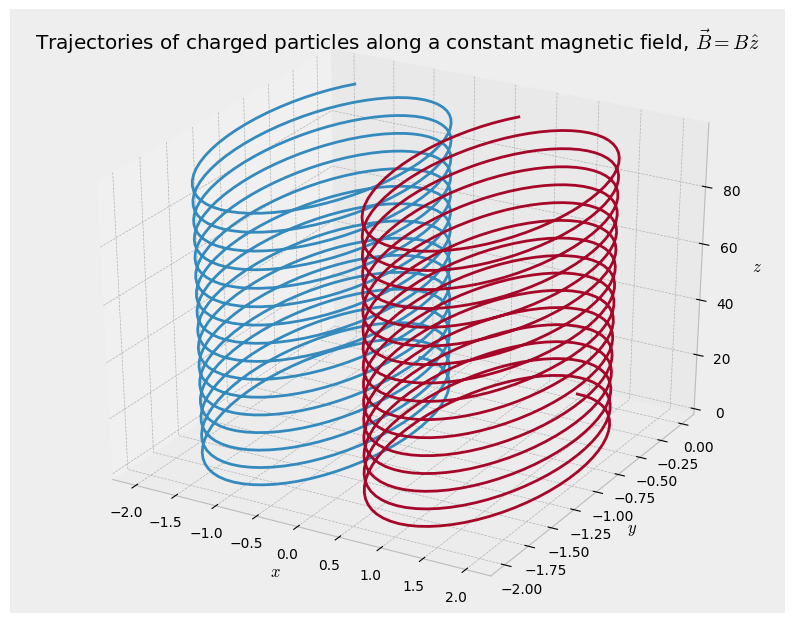

In [ ]:
ComputeTrajectory(A1)
ComputeTrajectory(A2)
PlotTrajectory(A1,A2)


[Reference: Uniform Magnetic Field](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/uniform_magnetic_field_final.ipynb)